<a href="https://colab.research.google.com/github/immprasetyo/ibm-data-science/blob/main/eda-matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. SpaceX performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [ ]:
#!pip install --upgrade matplotlib
#!pip install --upgrade seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
import seaborn as sns
import requests

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
f_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
resp = requests.get(f_url)
content = resp.content

In [3]:
with open('dataset_part_2.csv', 'wb') as f:
  f.write(content)

df = pd.read_csv('dataset_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
columns = ['Flight Number', 'Date', 'Booster Version', 'Payload Mass', 'Orbit', 'Launch Site', 'Outcome', 'Flights', 'Grid Fins', 'Reused', 'Legs', 'Landing Pad', 'Block', 'Reused Count', 'Serial', 'Longitude', 'Latitude', 'Class']
df.columns = columns

In [5]:
df.dtypes

Flight Number        int64
Date                object
Booster Version     object
Payload Mass       float64
Orbit               object
Launch Site         object
Outcome             object
Flights              int64
Grid Fins             bool
Reused                bool
Legs                  bool
Landing Pad         object
Block              float64
Reused Count         int64
Serial              object
Longitude          float64
Latitude           float64
Class                int64
dtype: object

In [6]:
df['Flight Number'] = df['Flight Number'].astype('category')
df['Booster Version'] = df['Booster Version'].astype('category')
df['Orbit'] = df['Orbit'].astype('category')
df['Launch Site'] = df['Launch Site'].astype('category')
df['Serial'] = df['Serial'].astype('category')
df['Payload Mass'] = round(df['Payload Mass'], 1)

In [7]:
df.shape

(90, 18)

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


In [8]:
sns.set(style = 'ticks')

In [ ]:
#plt.subplots()

'''
###
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (4, 3))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (4, 3))

###
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (4, 3), sharey = True)
ax1.plot(x = x1, y = y1, data = df)
ax2.plot(x = x2, y = y2, data = df)

###
fig, ax1 = plt.subplots(1, 1, figsize = (4, 3))
ax1.plot(
    x = x1,
    y = y1,
    data = df,
    color = 'royalblue'
)

ax2 = ax1.twinx()
ax2.plot(
    x = x2,
    y = y2,
    data = df,
    color = 'darkorange'
)
'''

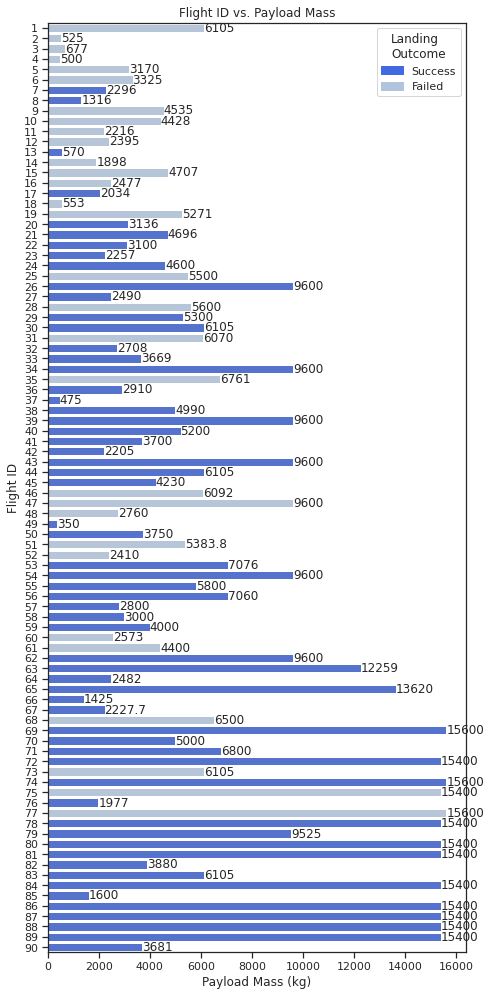

In [ ]:
fig, ax = plt.subplots(figsize = (7, 14))
colors = ['royalblue' if i == 1 else 'lightsteelblue' for i in df['Class']]

sns.barplot(
    ax = ax,
    x = 'Payload Mass',
    y = 'Flight Number',
    data = df,
    orient = 'h',
    palette = colors
)

for i in ax.containers:
    ax.bar_label(i)

ax.set(
    xlabel = 'Payload Mass (kg)',
    ylabel = 'Flight ID',
    title = 'Flight ID vs. Payload Mass'
)

legend_dict = {'Success': 'royalblue', 'Failed': 'lightsteelblue'}
patches = []

for i in legend_dict:
  patch = ptc.Patch(label = i, color = legend_dict[i])
  patches.append(patch)

ax.legend(title = 'Landing\nOutcome', handles = patches)
fig.tight_layout()
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site

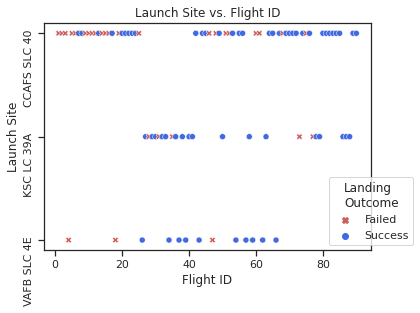

In [ ]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
fig, ax = plt.subplots(figsize = (6, 4.5))

sns.scatterplot(
    ax = ax,
    x = 'Flight Number',
    y = 'Launch Site',
    data = df,
    style = 'Class',
    markers = ['X', 'o'],
    hue = 'Class',
    palette = ['indianred', 'royalblue']
)

ax.set(
    xlabel = 'Flight ID',
    ylabel = 'Launch Site',
    title = 'Launch Site vs. Flight ID'
)

ax.tick_params(axis = 'y', labelrotation = 90)

labels = {0: 'Failed', 1: 'Success'}
legend = ax.legend(title = 'Landing\nOutcome', bbox_to_anchor = (1, 0), loc = 8)

for i, t in enumerate(legend.texts):
    t.set_text(labels[i])

fig.tight_layout()
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


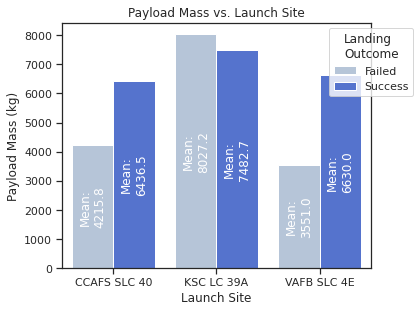

In [ ]:
# Bar-plot with x axis to be the launch site and y axis to be Pay Load Mass (kg), and hue to be the class value
fig, ax = plt.subplots(figsize = (6, 4.5))

sns.barplot(
    ax = ax,
    x = 'Launch Site',
    y = 'Payload Mass',
    data = df,
    hue = 'Class',
    errorbar = None,
    palette = ['lightsteelblue', 'royalblue']
)

for i in ax.containers:
  ax.bar_label(i, fmt = 'Mean:\n%.1f', label_type = 'center', rotation = 90, color = 'white')

ax.set(
    xlabel = 'Launch Site',
    ylabel = 'Payload Mass (kg)',
    title = 'Payload Mass vs. Launch Site'
)

ax.legend(
    title = 'Landing\nOutcome',
    labels = ['Failed', 'Success'],
    bbox_to_anchor = (1, 1),
    loc = 9
)

fig.tight_layout()
plt.show()

### TASK  3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [ ]:
# HINT use groupby method on Orbit column and get the mean of Class column
df1 = df.groupby(['Orbit']).agg({'Class': 'mean'}).reset_index()
df1.head()

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048


In [ ]:
df1['Class'] = round(df1['Class'], 3)
df1 = df1.sort_values('Class', ascending = False).reset_index(drop = True)
df1

,Orbit,Class
0,ES-L1,1.000
1,GEO,1.000
2,HEO,1.000
3,SSO,1.000
4,VLEO,0.857
5,LEO,0.714
6,MEO,0.667
7,PO,0.667
8,ISS,0.619
9,GTO,0.519


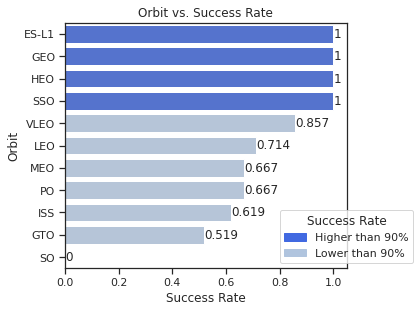

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4.5))
colors = ['lightsteelblue' if i < max(df1['Class']) else 'royalblue' for i in df1['Class']]

sns.barplot(
    ax = ax,
    x = 'Class',
    y = 'Orbit',
    data = df1,
    orient = 'h',
    order = df1['Orbit'],
    palette = colors
)

for i in ax.containers:
    ax.bar_label(i)

ax.set(
    xlabel = 'Success Rate',
    ylabel = 'Orbit',
    title = 'Orbit vs. Success Rate'
)

legend_dict = {'Higher than 90%': 'royalblue', 'Lower than 90%': 'lightsteelblue'}
patches = []

for i in legend_dict:
  patch = ptc.Patch(label = i, color = legend_dict[i])
  patches.append(patch) 

ax.legend(
    title = 'Success Rate',
    handles = patches,
    bbox_to_anchor = (1, 0),
    loc = 8
)

fig.tight_layout()
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


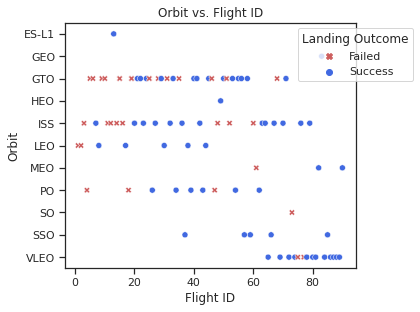

In [9]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
fig, ax = plt.subplots(figsize = (6, 4.5))

sns.scatterplot(
    ax = ax,
    x = 'Flight Number',
    y = 'Orbit',
    data = df,
    style = 'Class',
    markers = ['X', 'o'],
    hue = 'Class',
    palette = ['indianred', 'royalblue']
)

ax.set(
    xlabel = 'Flight ID',
    ylabel = 'Orbit',
    title = 'Orbit vs. Flight ID'
)

labels = {0: 'Failed', 1: 'Success'}
legend = ax.legend(title = 'Landing Outcome', bbox_to_anchor = (1, 1), loc = 9)

for i, t in enumerate(legend.texts):
  t.set_text(labels[i])

fig.tight_layout()
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type

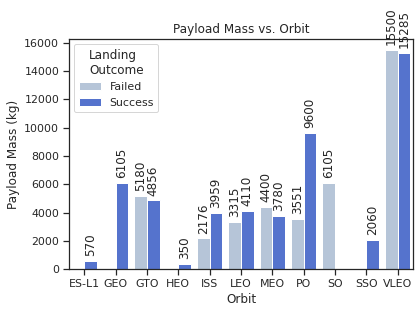

In [ ]:
# Bar-plot with x axis to be Orbit and y axis to be the Payload, and hue to be the class value
fig, ax = plt.subplots(figsize = (6, 4.5))

sns.barplot(
    ax = ax,
    x = 'Orbit',
    y = 'Payload Mass',
    data = df,
    hue = 'Class',
    errorbar = None,
    palette = ['lightsteelblue', 'royalblue']
)

ax.set(
    xlabel = 'Orbit',
    ylabel = 'Payload Mass (kg)',
    title = 'Payload Mass vs. Orbit'
)

for i in ax.containers:
  ax.bar_label(i, fmt = '%.0f', padding = 5, rotation = 90)

ax.legend(
    title = 'Landing\nOutcome',
    labels = ['Failed', 'Success'],
    bbox_to_anchor = (0, 1),
    loc = 2
)

fig.tight_layout()
plt.show()

### TASK  6: Visualize the launch success yearly trend

The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date 
year = []

def extract_year():
    for i in df['Date']:
        year.append(i.split('-')[0])
    return year

extract_year()

df['Year'] = year
df.head()

,Flight Number,Date,Booster Version,Payload Mass,Orbit,Launch Site,Outcome,Flights,Grid Fins,Reused,Legs,Landing Pad,Block,Reused Count,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6105.0,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.0,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.0,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [ ]:
df2 = df.groupby(['Year']).agg({'Class': 'mean'}).reset_index()
df2['Class'] = round(df2['Class'], 2)
df2

,Year,Class
0,2010,0.00
1,2012,0.00
2,2013,0.00
3,2014,0.33
4,2015,0.33
5,2016,0.62
6,2017,0.83
7,2018,0.61
8,2019,0.90
9,2020,0.84


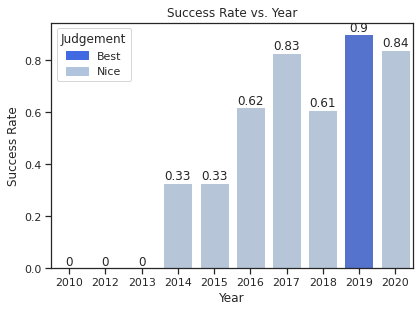

In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
fig, ax = plt.subplots(figsize = (6, 4.5))
colors = ['lightsteelblue' if i < max(df2['Class']) else 'royalblue' for i in df2['Class']]

sns.barplot(
    ax = ax,
    x = 'Year',
    y = 'Class',
    data = df2,
    errorbar = None,
    palette = colors
)

for i in ax.containers:
    ax.bar_label(i)

ax.set(
    xlabel = 'Year',
    ylabel = 'Success Rate',
    title = 'Success Rate vs. Year'
)

legend_dict = {'Best': 'royalblue', 'Nice': 'lightsteelblue'}
patches = []

for i in legend_dict:
  patch = ptc.Patch(label = i, color = legend_dict[i])
  patches.append(patch)

ax.legend(
    title = 'Judgement',
    handles = patches,
    bbox_to_anchor = (0, 1),
    loc = 2
)

fig.tight_layout()
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [ ]:
features = df[['Flight Number', 'Payload Mass', 'Orbit', 'Launch Site', 'Flights', 'Grid Fins', 'Reused', 'Legs', 'Landing Pad', 'Block', 'Reused Count', 'Serial']]
features.head()

,Flight Number,Payload Mass,Orbit,Launch Site,Flights,Grid Fins,Reused,Legs,Landing Pad,Block,Reused Count,Serial
0,1,6105.0,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.0,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.0,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.0,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.0,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns
dummies_df = pd.get_dummies(df[['Orbit', 'Launch Site', 'Landing Pad', 'Serial']], prefix = ['O', 'LS', 'LP', 'S'])
dummies_df.dtypes

O_ES-L1    uint8
O_GEO      uint8
O_GTO      uint8
O_HEO      uint8
O_ISS      uint8
           ...  
S_B1056    uint8
S_B1058    uint8
S_B1059    uint8
S_B1060    uint8
S_B1062    uint8
Length: 72, dtype: object

### TASK  8: Cast all numeric columns to `float64`

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: Use astype function
dummies_df.astype('float64')
dummies_df.head()

,O_ES-L1,O_GEO,O_GTO,O_HEO,O_ISS,O_LEO,O_MEO,O_PO,O_SO,O_SSO,...,S_B1048,S_B1049,S_B1050,S_B1051,S_B1054,S_B1056,S_B1058,S_B1059,S_B1060,S_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [ ]:
#dummies_df.to_csv('dummies_df.csv', index = False)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
